In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\User\Downloads\gold-cleaned.csv", usecols = ['Date','Price 2 Days Prior','Price 1 Day Prior','Price Today', 'Price Tomorrow', 'Price Change Tomorrow', 'Price Change Ten', 'Std Dev 10', 'Twenty Moving Average', 'Fifty Days Moving Average' ,'200 Days Moving Average', 'Monthly Inflation Rate','EFFR Rate', 'Volume', 'Treasury Par Yield Month', 'Treasury Par Yield Two Years', 'Treasury Par Yield Curve Rates (10 Years)', 'DXY', 'SP Open', 'VIX', 'Crude'])


In [3]:
data.head()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Days Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Years,Treasury Par Yield Curve Rates (10 Years),DXY,SP Open,VIX,Crude
0,"Wednesday, August 7, 2024","$2,405.87","$2,384.90","$2,385.83","$1,958.17",0.86%,8.94%,$30.16,"$2,414.75","$2,368.29",...,3.00%,2384.90%,96 troy ounces,1958.17%,4.00%,2384.90%,$103.37,"$5,293.13",24.77%,$72.84
1,"Thursday, August 8, 2024","$2,442.74","$2,405.87","$2,384.90","$2,385.83",0.93%,8.94%,$29.42,"$2,414.15","$2,367.79",...,3.00%,2405.87%,89 troy ounces,2385.83%,3.99%,2405.87%,$102.78,"$5,206.42",33.71%,$73.86
2,"Friday, August 9, 2024","$2,447.17","$2,442.74","$2,405.87","$2,384.90",-20.97%,8.94%,$28.34,"$2,413.23","$2,367.16",...,3.00%,2442.74%,86 troy ounces,2384.90%,3.89%,2442.74%,$103.22,"$5,151.14",23.39%,$74.21
3,"Saturday, August 10, 2024","$2,447.23","$2,447.17","$2,442.74","$2,405.87",-36.87%,8.94%,$28.62,"$2,411.09","$2,365.73",...,3.00%,2447.17%,89 troy ounces,2405.87%,3.88%,2447.17%,$104.31,"$5,376.63",20.52%,$76.87
4,"Sunday, August 11, 2024","$2,411.09","$2,447.23","$2,447.17","$2,442.74",-4.43%,8.94%,$26.08,"$2,408.57","$2,363.56",...,3.00%,2447.23%,83 troy ounces,2442.74%,4.16%,2447.23%,$104.07,"$5,537.84",16.20%,$78.59


In [4]:
#check the df structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date                                       676 non-null    object
 1   Price 2 Days Prior                         676 non-null    object
 2   Price 1 Day Prior                          676 non-null    object
 3   Price Today                                676 non-null    object
 4   Price Tomorrow                             676 non-null    object
 5   Price Change Tomorrow                      676 non-null    object
 6   Price Change Ten                           676 non-null    object
 7   Std Dev 10                                 676 non-null    object
 8   Twenty Moving Average                      676 non-null    object
 9   Fifty Days Moving Average                  676 non-null    object
 10  200 Days Moving Average               

In [5]:
#find number of rows and columns
data.shape

(677, 21)

In [6]:
#describe df numerical columns
data.describe()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Days Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Years,Treasury Par Yield Curve Rates (10 Years),DXY,SP Open,VIX,Crude
count,676,676,676,676,676,676,676,676,676,676,...,676,676,676,676,676,676,676,676,676,676
unique,676,673,673,673,672,632,646,589,668,668,...,22,673,82,672,254,673,472,650,544,583
top,"Saturday, June 13, 2026","$1,901.64","$1,919.54","$1,901.64","$1,958.17",-15.16%,8.94%,$20.98,"$2,025.29","$2,345.90",...,3.00%,1919.54%,96 troy ounces,1958.17%,4.46%,1919.54%,$105.67,"$5,281.45",13.98%,$76.60
freq,1,2,2,2,2,4,10,9,2,2,...,69,2,26,2,9,2,6,2,4,4


In [7]:
# Check for missing data
missing_data = data.isnull().sum()

# Display columns with missing values
print("Missing data in each column:\n", missing_data)

# Alternatively, show rows with any missing data
rows_with_missing_data = data[data.isnull().any(axis=1)]
print("Rows with missing data:\n", rows_with_missing_data)

Missing data in each column:
 Date                                         1
Price 2 Days Prior                           1
Price 1 Day Prior                            1
Price Today                                  1
Price Tomorrow                               1
Price Change Tomorrow                        1
Price Change Ten                             1
Std Dev 10                                   1
Twenty Moving Average                        1
Fifty Days Moving Average                    1
200 Days Moving Average                      1
Monthly Inflation Rate                       1
EFFR Rate                                    1
Volume                                       1
Treasury Par Yield Month                     1
Treasury Par Yield Two Years                 1
Treasury Par Yield Curve Rates (10 Years)    1
DXY                                          1
SP Open                                      1
VIX                                          1
Crude                         

In [8]:
#drop the missing values
data = data.dropna(how ='all')
#check the missing values
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(),4), '% missing values')
else:
    print("no missing value found")

no missing value found


In [9]:
data.tail()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Days Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Years,Treasury Par Yield Curve Rates (10 Years),DXY,SP Open,VIX,Crude
671,"Tuesday, June 9, 2026","$1,810.28","$1,791.61","$1,796.41","$1,801.52",5.11%,38.17%,$20.98,$450.82,$180.33,...,7.50%,1791.61%,71 troy ounces,1801.52%,0.87%,1791.61%,$96.26,"$4,697.66",19.85%,$79.62
672,"Wednesday, June 10, 2026","$1,813.88","$1,810.28","$1,791.61","$1,796.41",4.80%,47.40%,$20.98,$361.00,$144.40,...,7.50%,1810.28%,73 troy ounces,1796.41%,0.88%,1810.28%,$96.20,"$4,693.39",20.29%,$77.24
673,"Thursday, June 11, 2026","$1,804.27","$1,813.88","$1,810.28","$1,791.61",-18.67%,28.30%,$20.98,$271.42,$108.57,...,7.50%,1813.88%,74 troy ounces,1791.61%,0.83%,1813.88%,$96.31,"$4,787.99",17.07%,$77.18
674,"Friday, June 12, 2026","$1,815.73","$1,804.27","$1,813.88","$1,810.28",-3.60%,0.45%,$20.98,$180.91,$72.36,...,7.50%,1804.27%,74 troy ounces,1810.28%,0.77%,1804.27%,$96.19,"$4,804.51",16.57%,$76.02
675,"Saturday, June 13, 2026","$1,804.64","$1,829.05","$1,804.27","$1,813.88",9.61%,14.95%,$20.98,$90.21,$36.09,...,7.50%,1829.05%,74 troy ounces,1813.88%,0.78%,1829.05%,$95.67,"$4,778.14",17.60%,$75.69


In [10]:
#Change value to float:
import pandas as pd

# Example: DataFrame with strings representing monetary values
data =  pd.read_csv(r"C:\Users\User\Downloads\gold-cleaned.csv", usecols = ['Date','Price 2 Days Prior','Price 1 Day Prior','Price Today', 'Price Tomorrow', 'Price Change Tomorrow', 'Price Change Ten', 'Std Dev 10', 'Twenty Moving Average', 'Fifty Days Moving Average' ,'200 Days Moving Average', 'Monthly Inflation Rate','EFFR Rate', 'Volume', 'Treasury Par Yield Month', 'Treasury Par Yield Two Years', 'Treasury Par Yield Curve Rates (10 Years)', 'DXY', 'SP Open', 'VIX', 'Crude'])

data = pd.DataFrame(data)

# Remove dollar sign and commas, then convert to float
data['Price Today'] = data['Price Today'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price 2 Days Prior'] = data['Price 2 Days Prior'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price 1 Day Prior'] = data['Price 1 Day Prior'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price Tomorrow'] = data['Price Tomorrow'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Std Dev 10'] = data['Std Dev 10'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Twenty Moving Average'] = data['Twenty Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Fifty Days Moving Average'] = data['Fifty Days Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['200 Days Moving Average'] = data['200 Days Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['DXY'] = data['DXY'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['SP Open'] = data['SP Open'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Crude'] = data['Crude'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price Change Tomorrow'] = data['Price Change Tomorrow'].replace({'%': ''}, regex=True).astype(float) / 100
data['Price Change Ten'] = data['Price Change Ten'].replace({'%': ''}, regex=True).astype(float) / 100
data['Monthly Inflation Rate'] = data['Monthly Inflation Rate'].replace({'%': ''}, regex=True).astype(float) / 100
data['EFFR Rate'] = data['EFFR Rate'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Month'] = data['Treasury Par Yield Month'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Two Years'] = data['Treasury Par Yield Two Years'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Curve Rates (10 Years)'] = data['Treasury Par Yield Curve Rates (10 Years)'].replace({'%': ''}, regex=True).astype(float) / 100
data['VIX'] = data['VIX'].replace({'%': ''}, regex=True).astype(float) / 100
data['Volume'] = data['Volume'].replace(r'\D', '', regex=True).astype(float)
# Check the result
print(data)


                          Date  Price 2 Days Prior  Price 1 Day Prior  \
0    Wednesday, August 7, 2024             2405.87            2384.90   
1     Thursday, August 8, 2024             2442.74            2405.87   
2       Friday, August 9, 2024             2447.17            2442.74   
3    Saturday, August 10, 2024             2447.23            2447.17   
4      Sunday, August 11, 2024             2411.09            2447.23   
..                         ...                 ...                ...   
672   Wednesday, June 10, 2026             1813.88            1810.28   
673    Thursday, June 11, 2026             1804.27            1813.88   
674      Friday, June 12, 2026             1815.73            1804.27   
675    Saturday, June 13, 2026             1804.64            1829.05   
676                        NaN                 NaN                NaN   

     Price Today  Price Tomorrow  Price Change Tomorrow  Price Change Ten  \
0        2385.83         1958.17              

In [11]:
#1. Descriptive Statistics:(Mean, Median, Mode, Variance)
data =  pd.read_csv(r"C:\Users\User\Downloads\gold-cleaned.csv", usecols = ['Date','Price 2 Days Prior','Price 1 Day Prior','Price Today', 'Price Tomorrow', 'Price Change Tomorrow', 'Price Change Ten', 'Std Dev 10', 'Twenty Moving Average', 'Fifty Days Moving Average' ,'200 Days Moving Average', 'Monthly Inflation Rate','EFFR Rate', 'Volume', 'Treasury Par Yield Month', 'Treasury Par Yield Two Years', 'Treasury Par Yield Curve Rates (10 Years)', 'DXY', 'SP Open', 'VIX', 'Crude'])

data = pd.DataFrame(data)
data['Price Today'] = data['Price Today'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price 2 Days Prior'] = data['Price 2 Days Prior'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price 1 Day Prior'] = data['Price 1 Day Prior'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price Tomorrow'] = data['Price Tomorrow'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Std Dev 10'] = data['Std Dev 10'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Twenty Moving Average'] = data['Twenty Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Fifty Days Moving Average'] = data['Fifty Days Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['200 Days Moving Average'] = data['200 Days Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['DXY'] = data['DXY'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['SP Open'] = data['SP Open'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Crude'] = data['Crude'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price Change Tomorrow'] = data['Price Change Tomorrow'].replace({'%': ''}, regex=True).astype(float) / 100
data['Price Change Ten'] = data['Price Change Ten'].replace({'%': ''}, regex=True).astype(float) / 100
data['Monthly Inflation Rate'] = data['Monthly Inflation Rate'].replace({'%': ''}, regex=True).astype(float) / 100
data['EFFR Rate'] = data['EFFR Rate'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Month'] = data['Treasury Par Yield Month'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Two Years'] = data['Treasury Par Yield Two Years'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Curve Rates (10 Years)'] = data['Treasury Par Yield Curve Rates (10 Years)'].replace({'%': ''}, regex=True).astype(float) / 100
data['VIX'] = data['VIX'].replace({'%': ''}, regex=True).astype(float) / 100
data['Volume'] = data['Volume'].replace(r'\D', '', regex=True).astype(float)


# Drop the 'Date' column as it is not numeric
data = data.drop(columns=['Date'])

print(data)

# Calculate the statistics (mean, median, mode, variance)
statistics = data.describe().T  # Transpose so that the columns are rows
statistics['mean'] = data.mean()
statistics['median'] = data.median()
statistics['mode'] = data.mode().iloc[0]  # Use the first mode if multiple modes exist
statistics['variance'] = data.var()

# Print the statistics
print("\nStatistics (Mean, Median, Mode, Variance):")
print(statistics[['mean', 'median', 'mode', 'variance']])




     Price 2 Days Prior  Price 1 Day Prior  Price Today  Price Tomorrow  \
0               2405.87            2384.90      2385.83         1958.17   
1               2442.74            2405.87      2384.90         2385.83   
2               2447.17            2442.74      2405.87         2384.90   
3               2447.23            2447.17      2442.74         2405.87   
4               2411.09            2447.23      2447.17         2442.74   
..                  ...                ...          ...             ...   
672             1813.88            1810.28      1791.61         1796.41   
673             1804.27            1813.88      1810.28         1791.61   
674             1815.73            1804.27      1813.88         1810.28   
675             1804.64            1829.05      1804.27         1813.88   
676                 NaN                NaN          NaN             NaN   

     Price Change Tomorrow  Price Change Ten  Std Dev 10  \
0                   0.0086            0

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<Figure size 1000x600 with 0 Axes>

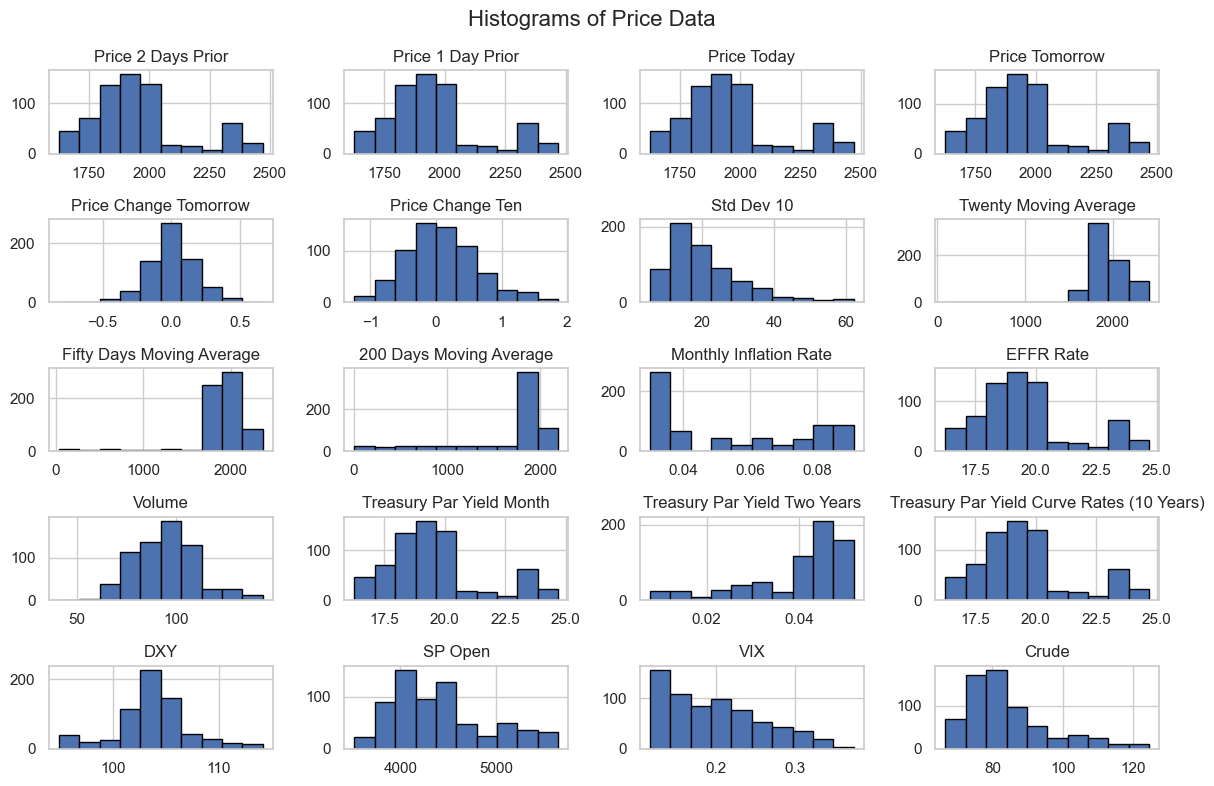

In [13]:
#Data Visualization:
import matplotlib.pyplot as plt

# Set the style for plots
import seaborn as sns
sns.set(style="whitegrid")

# 1. Histograms for each numeric column
plt.figure(figsize=(10, 6))
data.hist(bins=10, edgecolor='black', figsize=(12, 8))
plt.suptitle('Histograms of Price Data', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_50860\769723011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\769723011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\769723011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\769723011.py:7: FutureWarning: 

Passing `palette` without a

ValueError: num must be an integer with 1 <= num <= 4, not 5

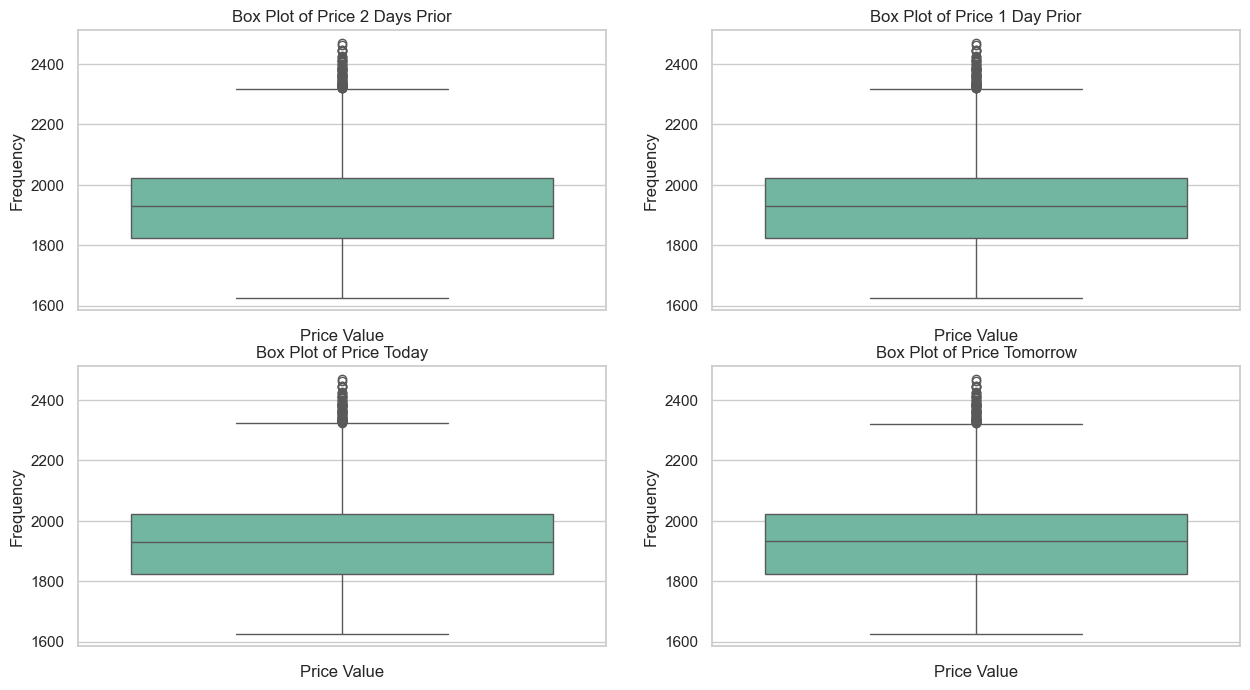

In [15]:
# Plot box plot for each column individually
price_columns = ['Price 2 Days Prior', 'Price 1 Day Prior','Price Today', 'Price Tomorrow', 'Price Change Tomorrow', 'Price Change Ten', 'Std Dev 10', 'Twenty Moving Average', 'Fifty Days Moving Average' ,'200 Days Moving Average', 'Monthly Inflation Rate','EFFR Rate', 'Volume', 'Treasury Par Yield Month', 'Treasury Par Yield Two Years', 'Treasury Par Yield Curve Rates (10 Years)', 'DXY', 'SP Open', 'VIX', 'Crude']

plt.figure(figsize=(15, 8))
for i, column in enumerate(price_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(data=data[column], palette="Set2")
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel('Price Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_50860\3873994314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\3873994314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\3873994314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\3873994314.py:6: FutureWarning: 

Passing `palette` witho

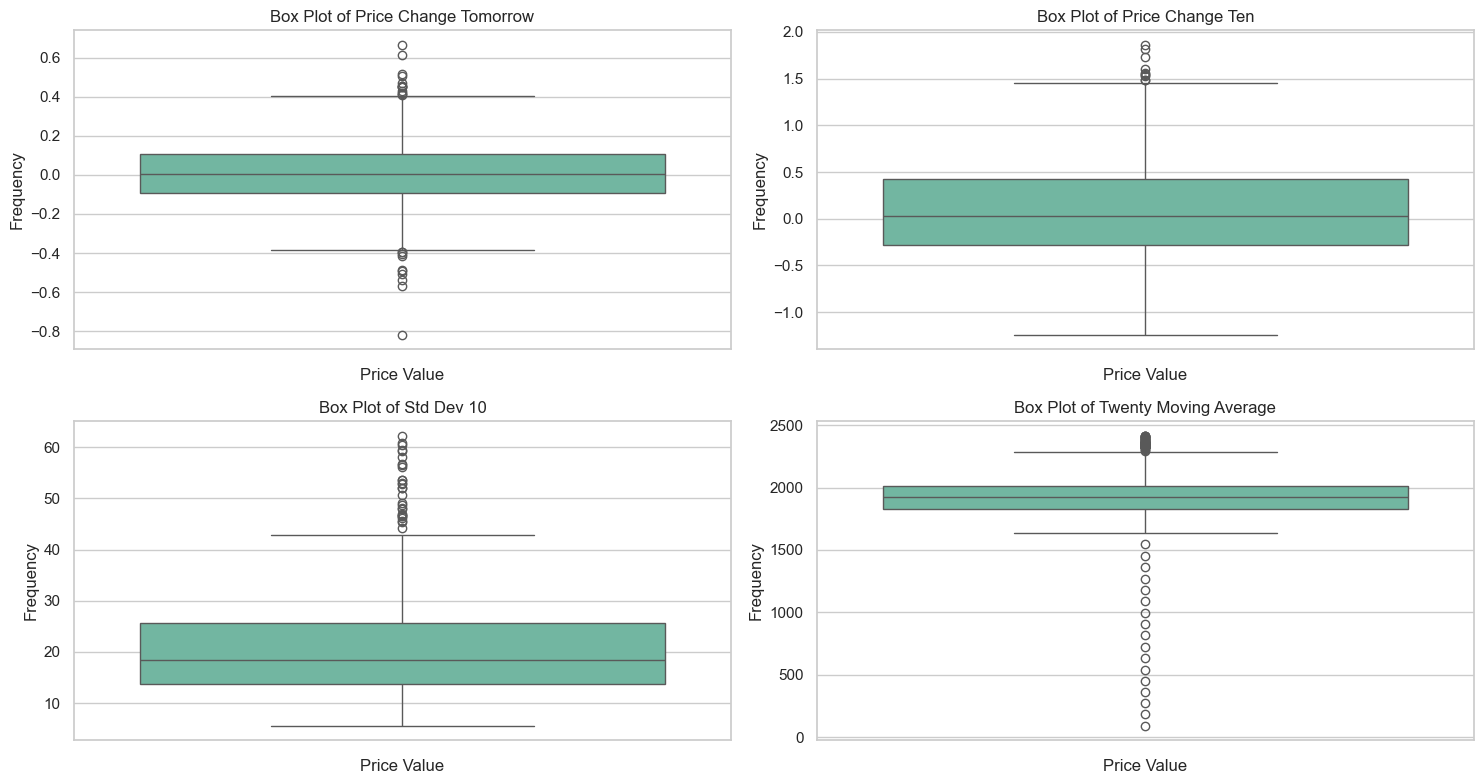

In [16]:
# Plot box plot for each column individually
price_columns = [ 'Price Change Tomorrow', 'Price Change Ten', 'Std Dev 10', 'Twenty Moving Average']
plt.figure(figsize=(15, 8))
for i, column in enumerate(price_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(data=data[column], palette="Set2")
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel('Price Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_50860\3569495228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\3569495228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\3569495228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\3569495228.py:6: FutureWarning: 

Passing `palette` witho

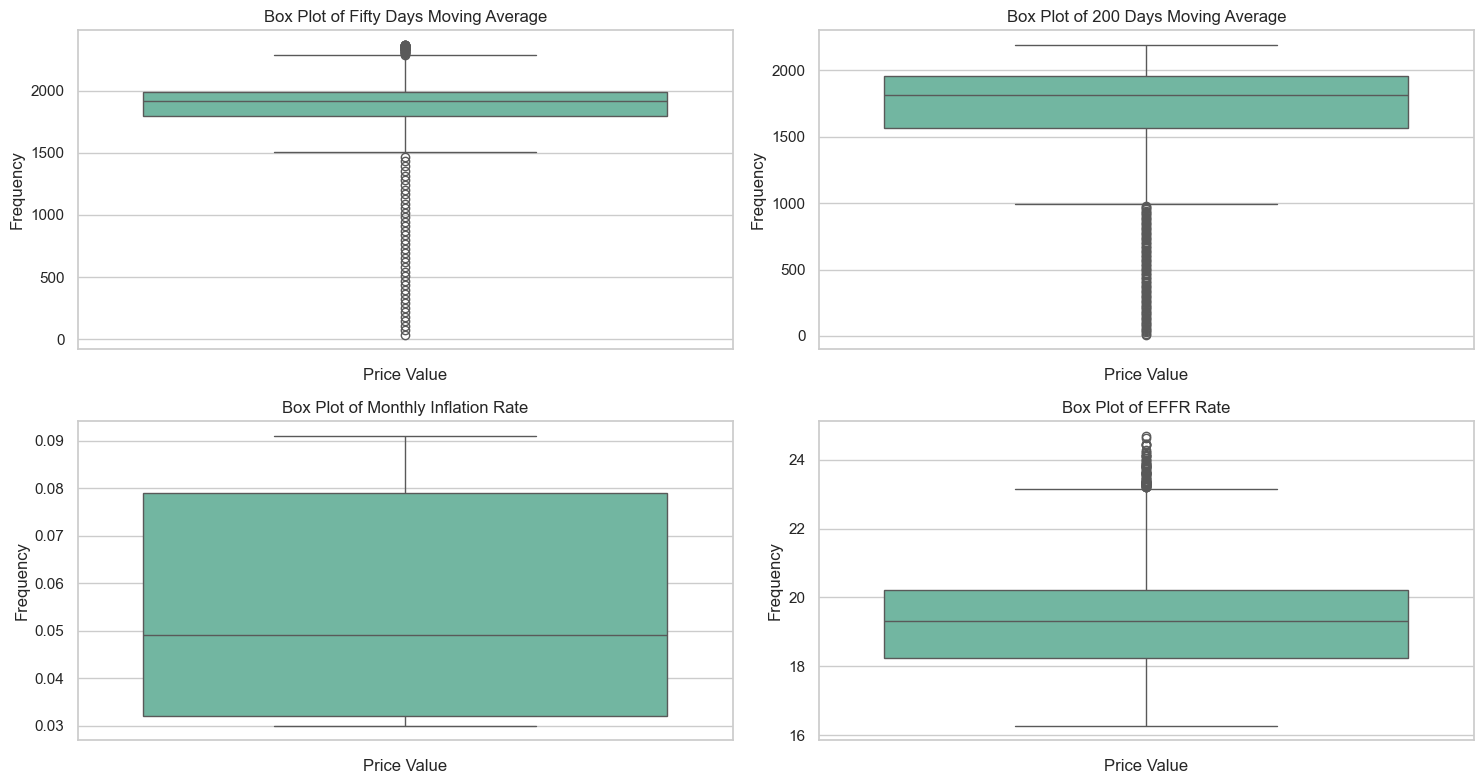

In [17]:
# Plot box plot for each column individually
price_columns = ['Fifty Days Moving Average' ,'200 Days Moving Average', 'Monthly Inflation Rate','EFFR Rate']
plt.figure(figsize=(15, 8))
for i, column in enumerate(price_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(data=data[column], palette="Set2")
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel('Price Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_50860\1164696721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\1164696721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\1164696721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\1164696721.py:5: FutureWarning: 

Passing `palette` witho

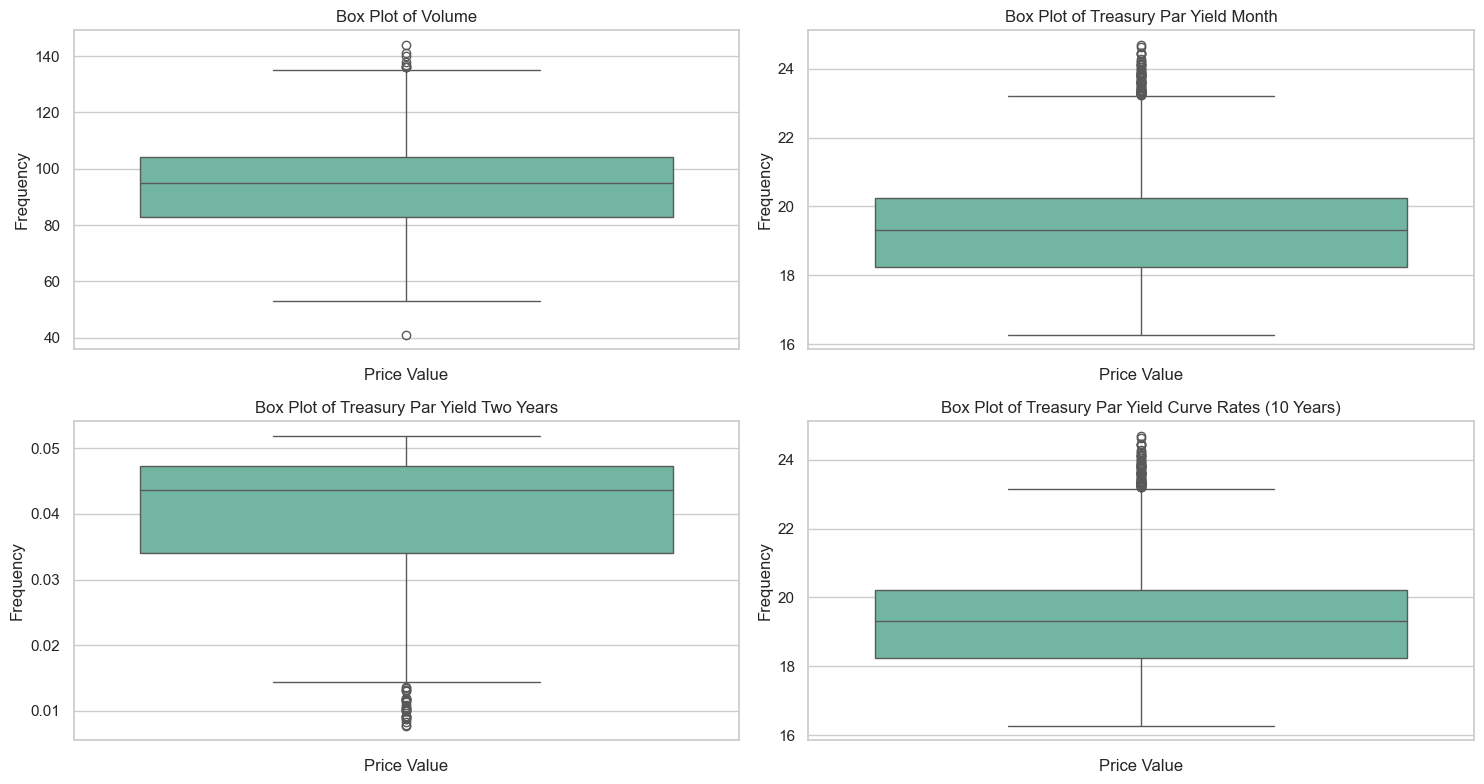

In [18]:
price_columns = ['Volume', 'Treasury Par Yield Month', 'Treasury Par Yield Two Years', 'Treasury Par Yield Curve Rates (10 Years)']
plt.figure(figsize=(15, 8))
for i, column in enumerate(price_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(data=data[column], palette="Set2")
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel('Price Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_50860\907149471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\907149471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\907149471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_50860\907149471.py:5: FutureWarning: 

Passing `palette` without a

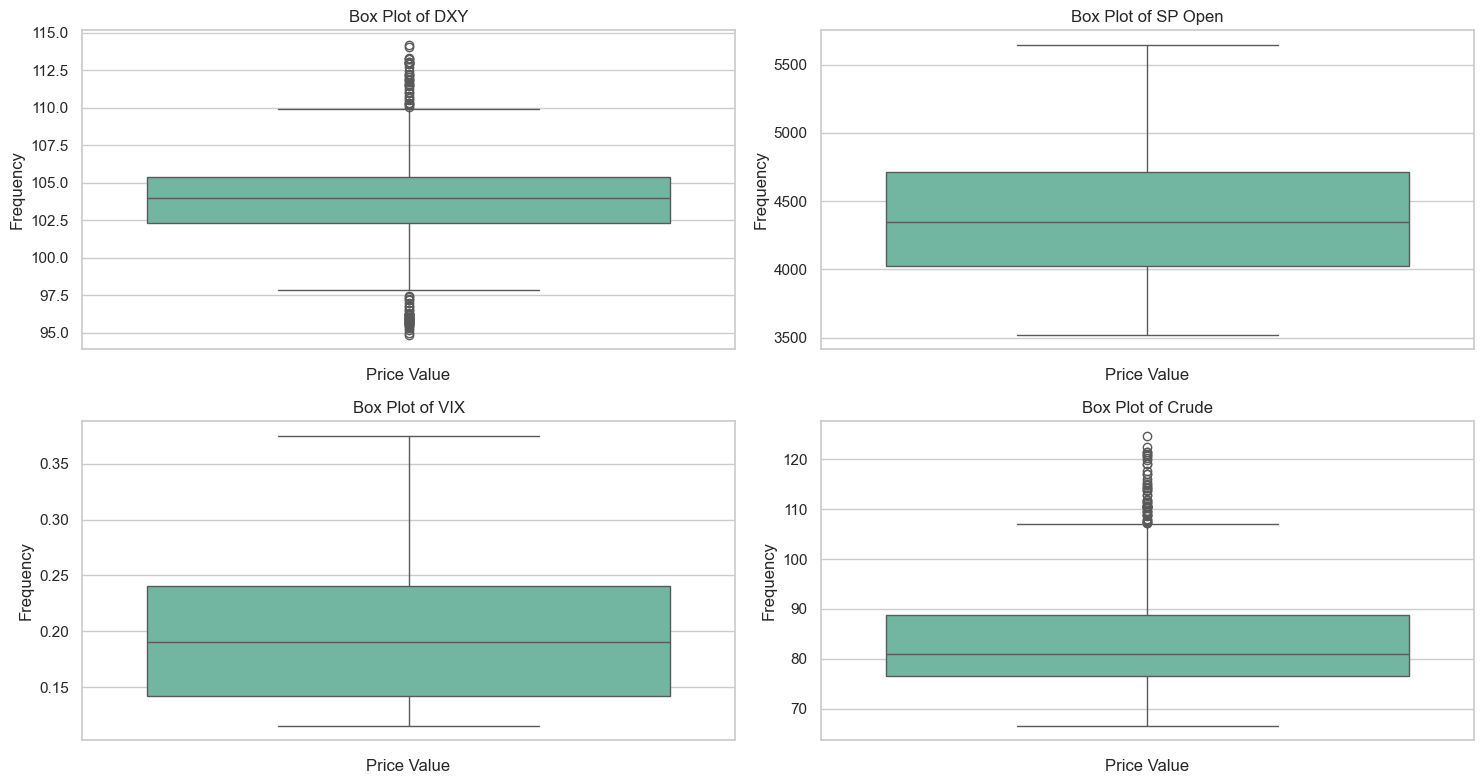

In [19]:
price_columns = ['DXY', 'SP Open', 'VIX', 'Crude']
plt.figure(figsize=(15, 8))
for i, column in enumerate(price_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(data=data[column], palette="Set2")
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel('Price Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

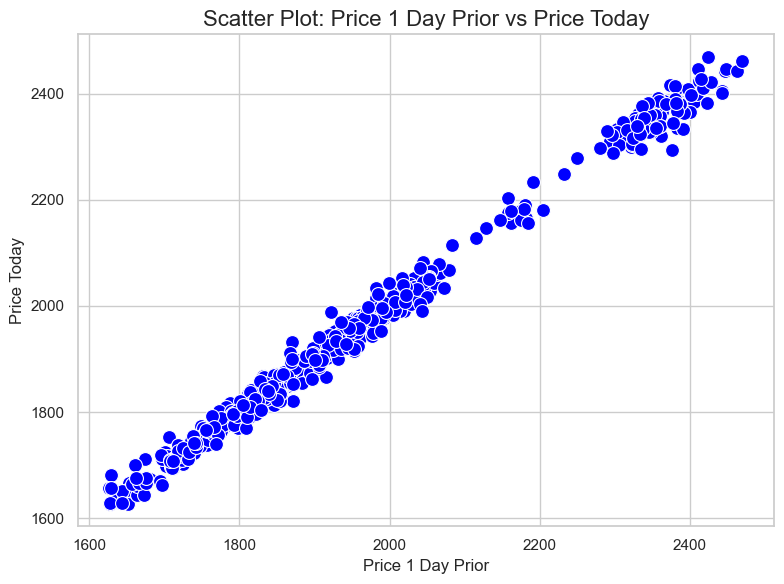

In [20]:
# 3. Scatter plot to visualize relationships (Price 1 Day Prior vs Price Today)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price 1 Day Prior'], y=data['Price Today'], color='blue', s=100)
plt.title('Scatter Plot: Price 1 Day Prior vs Price Today', fontsize=16)
plt.xlabel('Price 1 Day Prior')
plt.ylabel('Price Today')
plt.tight_layout()
plt.show()


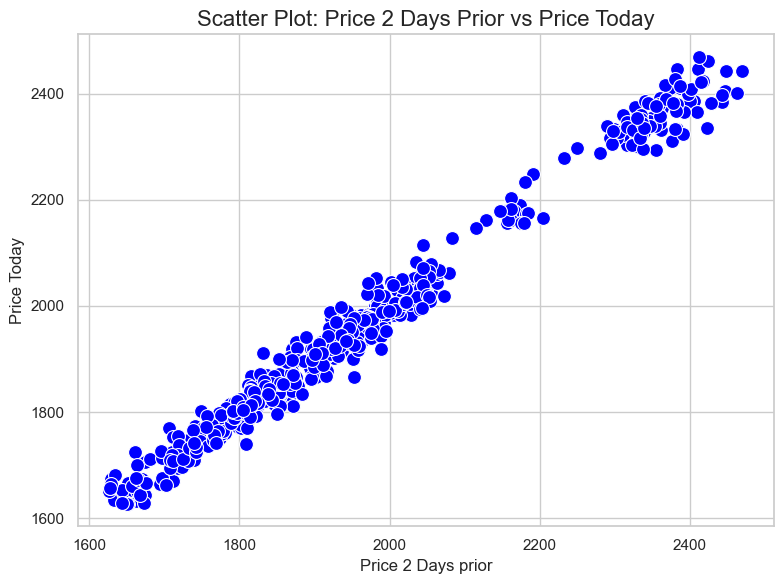

In [21]:
# 3. Scatter plot to visualize relationships (Price 1 Day Prior vs Price Today)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price 2 Days Prior'], y=data['Price Today'], color='blue', s=100)
plt.title('Scatter Plot: Price 2 Days Prior vs Price Today', fontsize=16)
plt.xlabel('Price 2 Days prior')
plt.ylabel('Price Today')
plt.tight_layout()
plt.show()


Numeric Columns:
(677, 20)
   Price 2 Days Prior  Price 1 Day Prior  Price Today  Price Tomorrow  \
0             2405.87            2384.90      2385.83         1958.17   
1             2442.74            2405.87      2384.90         2385.83   
2             2447.17            2442.74      2405.87         2384.90   
3             2447.23            2447.17      2442.74         2405.87   
4             2411.09            2447.23      2447.17         2442.74   

   Price Change Tomorrow  Price Change Ten  Std Dev 10  Twenty Moving Average  \
0               0.000086          0.000894       30.16                2414.75   
1               0.000093          0.000894       29.42                2414.15   
2              -0.002097          0.000894       28.34                2413.23   
3              -0.003687          0.000894       28.62                2411.09   
4              -0.000443          0.000894       26.08                2408.57   

   Fifty Days Moving Average  200 Days Moving A

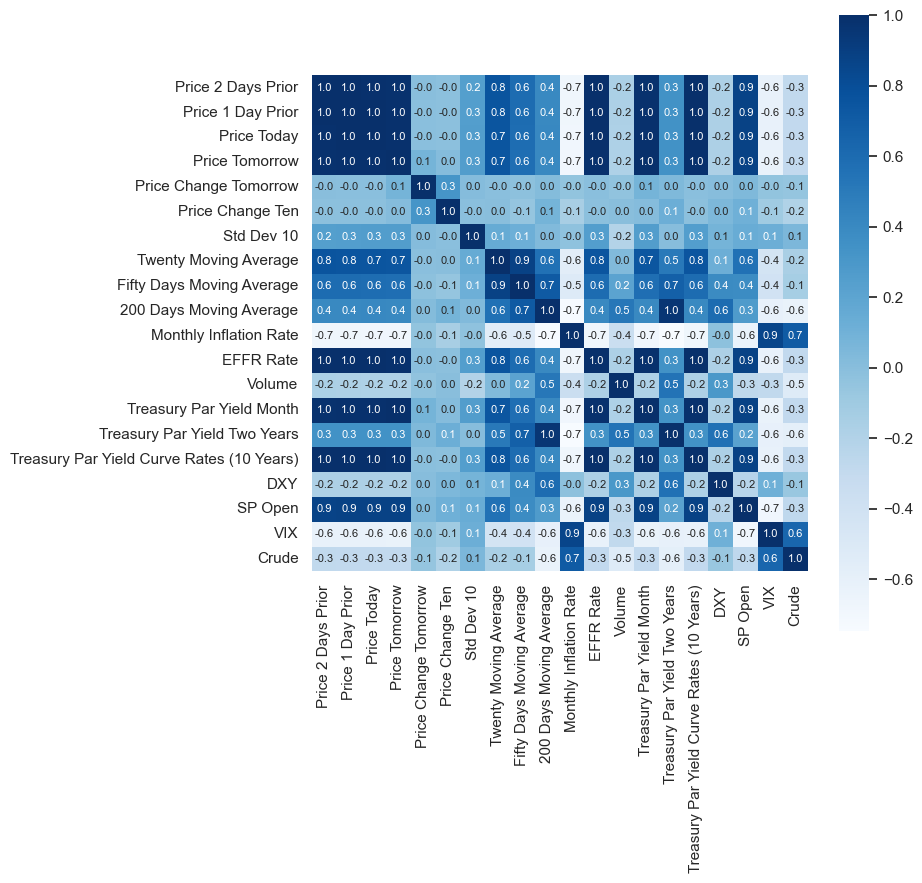

In [22]:
# Print the shape and head of the original data
data['Price Today'] = data['Price Today'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price 2 Days Prior'] = data['Price 2 Days Prior'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price 1 Day Prior'] = data['Price 1 Day Prior'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price Tomorrow'] = data['Price Tomorrow'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Std Dev 10'] = data['Std Dev 10'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Twenty Moving Average'] = data['Twenty Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Fifty Days Moving Average'] = data['Fifty Days Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['200 Days Moving Average'] = data['200 Days Moving Average'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['DXY'] = data['DXY'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['SP Open'] = data['SP Open'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Crude'] = data['Crude'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
data['Price Change Tomorrow'] = data['Price Change Tomorrow'].replace({'%': ''}, regex=True).astype(float) / 100
data['Price Change Ten'] = data['Price Change Ten'].replace({'%': ''}, regex=True).astype(float) / 100
data['Monthly Inflation Rate'] = data['Monthly Inflation Rate'].replace({'%': ''}, regex=True).astype(float) / 100
data['EFFR Rate'] = data['EFFR Rate'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Month'] = data['Treasury Par Yield Month'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Two Years'] = data['Treasury Par Yield Two Years'].replace({'%': ''}, regex=True).astype(float) / 100
data['Treasury Par Yield Curve Rates (10 Years)'] = data['Treasury Par Yield Curve Rates (10 Years)'].replace({'%': ''}, regex=True).astype(float) / 100
data['VIX'] = data['VIX'].replace({'%': ''}, regex=True).astype(float) / 100
data['Volume'] = data['Volume'].replace(r'\D', '', regex=True).astype(float)


numeric_columns = data.select_dtypes(include=['number'])
print("Numeric Columns:")
print(numeric_columns.shape)  # Should show rows x numeric columns
print(numeric_columns.head())  # Print the first few rows of numeric columns

# If no numeric columns are found, the correlation will fail.
if numeric_columns.shape[1] == 0:
    print("No numeric columns found! Cannot compute correlation.")
else:
    # Compute the correlation matrix
    correlation = numeric_columns.corr()
    print("Correlation Matrix:")
    print(correlation)

    # Plot the heatmap if the correlation matrix is non-empty
    if correlation.shape[0] > 0 and correlation.shape[1] > 0:
        import seaborn as sns
        import matplotlib.pyplot as plt

        plt.figure(figsize=(8, 8))
        sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
        plt.show()
    else:
        print("Correlation matrix is empty. No heatmap to display.")


  

In [23]:
#Correlation Analysis:
# Let's say 'Price Tomorrow' is the target variable
target_variable = 'Price Tomorrow'

# Pearson correlation (linear correlation)
pearson_corr = data.corr(method='pearson')

# Spearman correlation (rank correlation)
spearman_corr = data.corr(method='spearman')

# Print Pearson and Spearman correlations for the target variable
print(f"Pearson Correlation with {target_variable}:")
print(pearson_corr[target_variable])

print(f"\nSpearman Correlation with {target_variable}:")
print(spearman_corr[target_variable])


Pearson Correlation with Price Tomorrow:
Price 2 Days Prior                           0.984676
Price 1 Day Prior                            0.988450
Price Today                                  0.992326
Price Tomorrow                               1.000000
Price Change Tomorrow                        0.079917
Price Change Ten                             0.012188
Std Dev 10                                   0.256298
Twenty Moving Average                        0.743038
Fifty Days Moving Average                    0.582914
200 Days Moving Average                      0.405607
Monthly Inflation Rate                      -0.681276
EFFR Rate                                    0.988450
Volume                                      -0.177660
Treasury Par Yield Month                     1.000000
Treasury Par Yield Two Years                 0.343626
Treasury Par Yield Curve Rates (10 Years)    0.988450
DXY                                         -0.170607
SP Open                                  

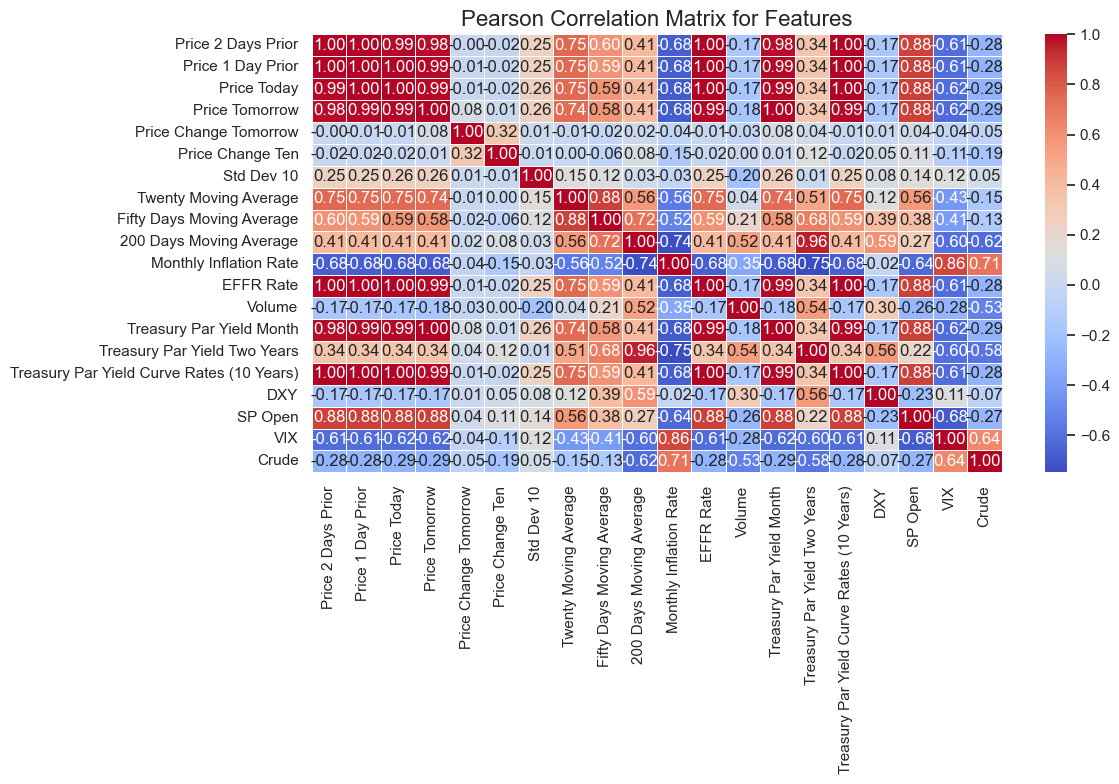

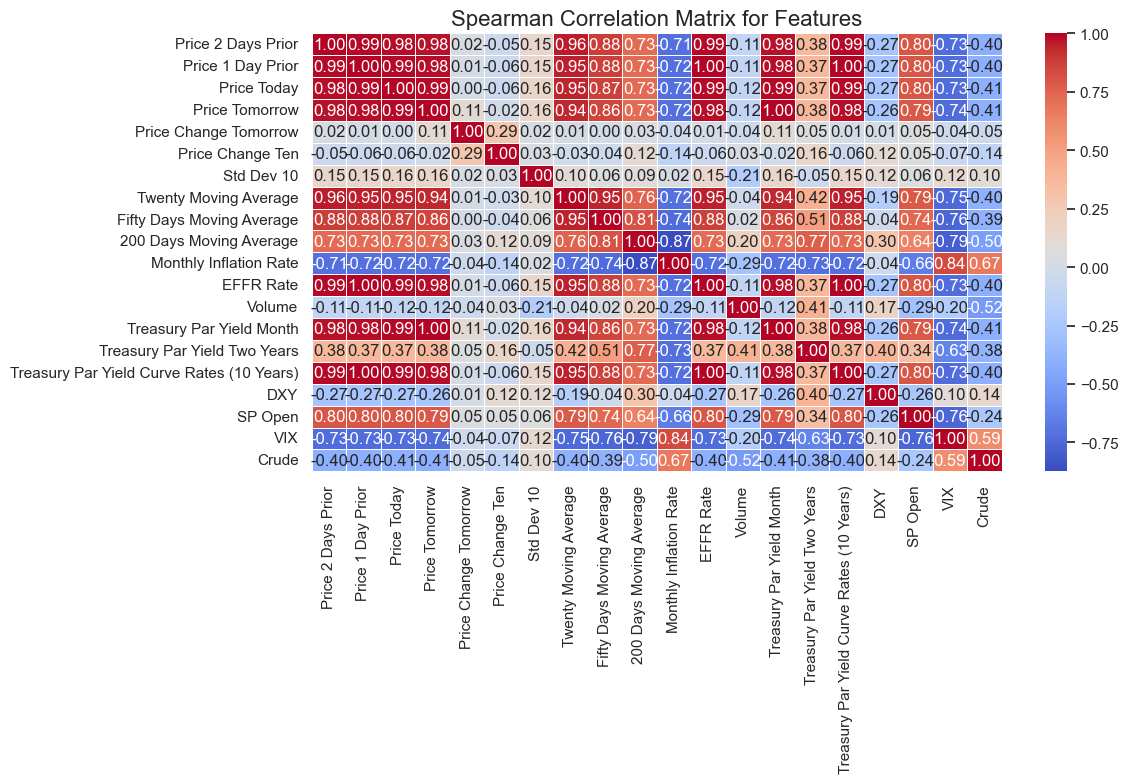

In [24]:
# Pearson Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Pearson Correlation Matrix for Features', fontsize=16)
plt.tight_layout()
plt.show()

# Spearman Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Spearman Correlation Matrix for Features', fontsize=16)
plt.tight_layout()
plt.show()
